In [24]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from joblib import dump, load
from imblearn.over_sampling import SMOTE

In [25]:
df = pd.read_csv('df_preprocessed.csv',)
row_count = df.shape[0]
column_count = df.shape[1]
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df

The DataFrame has 96082 rows.
The DataFrame has 6 columns.


,FATALITIES,YEAR,INTERACTION,EVENT_TYPE,country_num,admin_num
0,0.0,-1.771717,-0.265106,0,0.0,2.237773
1,0.0,-1.771717,-0.265106,0,0.0,2.237773
2,0.0,-1.771717,-0.265106,0,0.0,2.237773
3,0.0,-1.771717,-0.265106,0,0.0,2.237773
4,0.0,-1.771717,0.000000,0,0.0,0.000000
...,...,...,...,...,...,...
96077,0.0,1.181145,2.054573,2,0.0,2.237773
96078,0.0,0.590572,0.000000,2,0.0,2.237773
96079,0.0,0.590572,2.054573,2,0.0,2.237773
96080,0.0,0.590572,0.000000,0,0.0,2.237773


In [26]:
x = df.drop('EVENT_TYPE', axis=1)
y = df['EVENT_TYPE']
smt = SMOTE()
x_smote, y_smote = smt.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, random_state=0)

In [27]:
knn = GridSearchCV(estimator= KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'algorithm': ['kd_tree']}, n_jobs=-1)

knn.fit(x_train, y_train)
knn.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 7}

In [41]:
dump(knn, "knn_model.joblib") 

['knn_model.joblib']

In [40]:
param_grid = {
    'C': [1],
    'kernel': ['rbf'],
    'gamma': [10],
}
svm = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=3)
svm.fit(x_train, y_train)
svm.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ........C=10, gamma=10, kernel=rbf;, score=0.886 total time=43.4min
[CV 5/5] END ........C=10, gamma=10, kernel=rbf;, score=0.886 total time=43.4min
[CV 3/5] END ........C=10, gamma=10, kernel=rbf;, score=0.886 total time=43.5min
[CV 4/5] END ........C=10, gamma=10, kernel=rbf;, score=0.888 total time=43.7min
[CV 2/5] END ........C=10, gamma=10, kernel=rbf;, score=0.883 total time=46.7min
[CV 1/5] END .........C=1, gamma=10, kernel=rbf;, score=0.881 total time=48.6min
[CV 3/5] END .........C=1, gamma=10, kernel=rbf;, score=0.879 total time=54.8min
[CV 2/5] END .........C=1, gamma=10, kernel=rbf;, score=0.877 total time=54.9min
[CV 5/5] END .........C=1, gamma=10, kernel=rbf;, score=0.880 total time=27.8min
[CV 4/5] END .........C=1, gamma=10, kernel=rbf;, score=0.881 total time=27.9min


{'C': 10, 'gamma': 10, 'kernel': 'rbf'}

In [30]:
dump(svm, "svm_model.joblib")

['svm_model.joblib']

In [ ]:
param_grid = {
    'n_estimators' : [10, 50, 100],
    'criterion': ['gini'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
}
random_forest = GridSearchCV(estimator=RandomForestClassifier(),  param_grid=param_grid,
                     n_jobs=-1, verbose=3, cv=5)
random_forest.fit(x_train, y_train)
random_forest.best_params_

In [32]:
random_forest = random_forest.best_estimator_
dump(random_forest, "random_forest_model.joblib") 

['random_forest_model.joblib']

/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

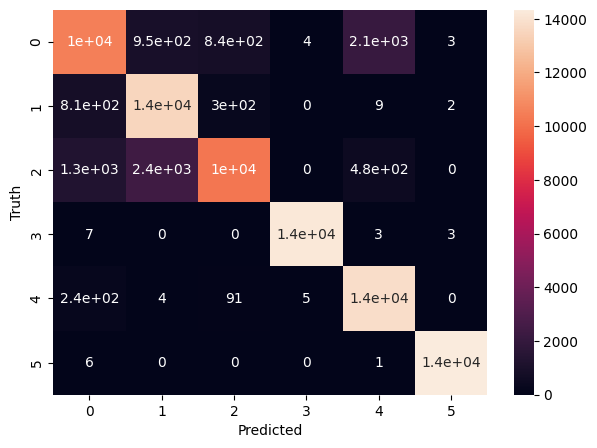

In [33]:
y_pred = knn.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77     14406
           1       0.80      0.92      0.86     14633
           2       0.89      0.71      0.79     14321
           3       1.00      1.00      1.00     14223
           4       0.84      0.98      0.90     14164
           5       1.00      1.00      1.00     14343

    accuracy                           0.89     86090
   macro avg       0.89      0.89      0.89     86090
weighted avg       0.89      0.89      0.89     86090



/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

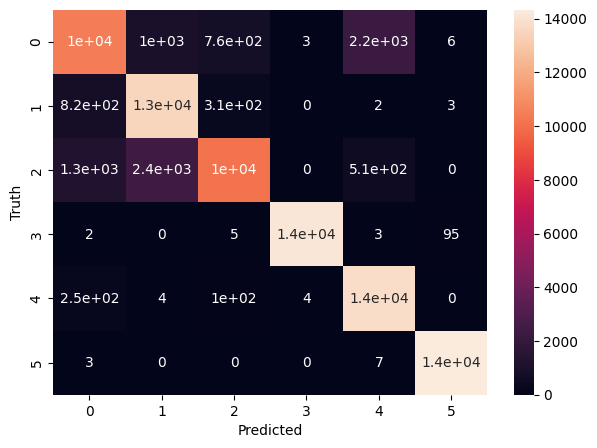

In [42]:
y_pred = svm.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [36]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.69      0.75     14406
           1       0.78      0.92      0.85     14633
           2       0.89      0.71      0.79     14321
           3       1.00      0.99      1.00     14223
           4       0.83      0.97      0.90     14164
           5       0.99      1.00      1.00     14343

    accuracy                           0.88     86090
   macro avg       0.88      0.88      0.88     86090
weighted avg       0.88      0.88      0.88     86090



/home/mishhgun/programming/ml-2023/.venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

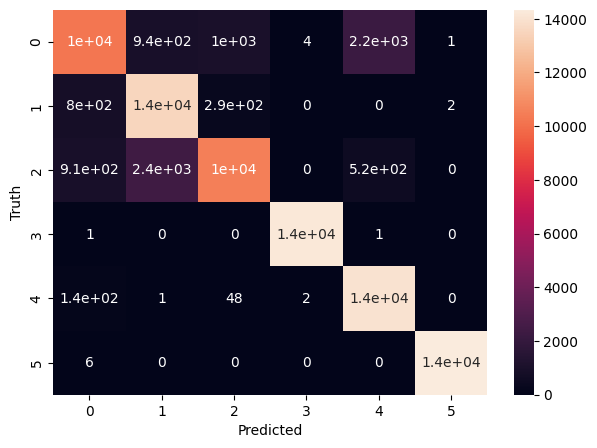

In [37]:
y_pred = random_forest.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77     14406
           1       0.80      0.92      0.86     14633
           2       0.89      0.73      0.80     14321
           3       1.00      1.00      1.00     14223
           4       0.84      0.99      0.91     14164
           5       1.00      1.00      1.00     14343

    accuracy                           0.89     86090
   macro avg       0.90      0.89      0.89     86090
weighted avg       0.89      0.89      0.89     86090



Variable: INTERACTION          Importance: 0.68
Variable: YEAR                 Importance: 0.15
Variable: admin_num            Importance: 0.14
Variable: FATALITIES           Importance: 0.04
Variable: country_num          Importance: 0.0


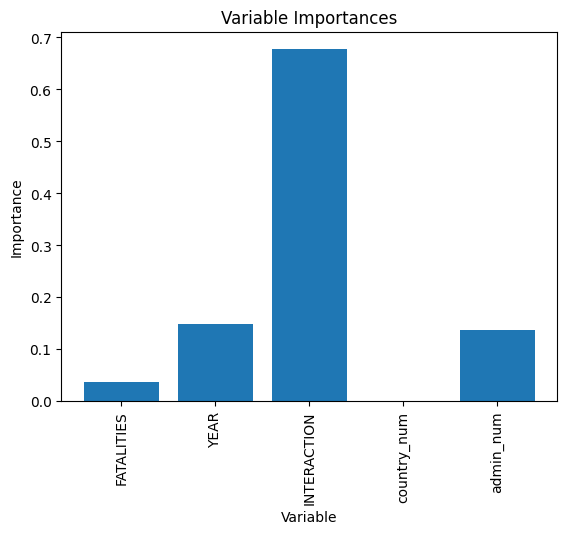

In [39]:
# Get numerical feature importances
importances = random_forest.feature_importances_

# Get the name of the features
feature_list = list(x.columns)

# List of tuples with variable and importance
feature_importance= [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()